# Decision Tree

## Imports and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.tree import export_text

df_telecom = pd.read_csv('telecom_users.csv')
df_telecom.drop('num', axis=1, inplace = True)
df_telecom.drop('customerID', axis=1, inplace = True)
df_telecom.dropna(inplace = True)

tree_telecom = df_telecom
tree_telecom.replace(to_replace='No internet service', value='No', inplace=True)
tree_telecom.replace(to_replace='No phone service', value='No', inplace=True)

# Create Starting Table

In [2]:
tree_telecom['IS_fiberoptic'] = np.where(tree_telecom['InternetService'] == 'Fiber optic', 1, 0)
tree_telecom['IS_DSL'] = np.where(tree_telecom['InternetService'] == 'DSL', 1, 0)
tree_telecom['IS_no'] = np.where(tree_telecom['InternetService'] == 'No', 1, 0)

tree_telecom['Contract_two'] = np.where(tree_telecom['Contract'] == 'Two year', 1, 0)
tree_telecom['Contract_one'] = np.where(tree_telecom['Contract'] == 'One year', 1, 0)
tree_telecom['Contract_month'] = np.where(tree_telecom['Contract'] == 'Month-to-month', 1, 0)

tree_telecom['PM_mail'] = np.where(tree_telecom['PaymentMethod'] == 'Mailed check', 1, 0)
tree_telecom['PM_elect'] = np.where(tree_telecom['PaymentMethod'] == 'Electronic check', 1, 0)
tree_telecom['PM_credit'] = np.where(tree_telecom['PaymentMethod'] == 'Credit card (automatic)', 1, 0)
tree_telecom['PM_bank'] = np.where(tree_telecom['PaymentMethod'] == 'Bank transfer (automatic)', 1, 0)

tree_telecom.replace(['Yes', 'No'], [1, 0], inplace=True)
tree_telecom.replace(['Male', 'Female'], [1,0], inplace=True)
tree_telecom.replace(['Fiber optic', 'DSL'], [1,0], inplace=True)

tree_telecom['HouseholdPeople'] = 1
tree_telecom.loc[tree_telecom['Partner'] == 1, 'HouseholdPeople'] = tree_telecom['HouseholdPeople'] + 1
tree_telecom.loc[tree_telecom['Dependents'] == 1, 'HouseholdPeople'] = tree_telecom['HouseholdPeople'] + 1


tree_telecom = tree_telecom[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'HouseholdPeople','PhoneService', 'MultipleLines', 'IS_fiberoptic', 'IS_DSL', 'IS_no','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract_one', 'Contract_two', 'Contract_month', 'PM_mail', 'PM_elect', 'PM_credit', 'PM_bank', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

pd.set_option('display.max_columns', None)

tree_telecom

,gender,SeniorCitizen,Partner,Dependents,HouseholdPeople,PhoneService,MultipleLines,IS_fiberoptic,IS_DSL,IS_no,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_one,Contract_two,Contract_month,PM_mail,PM_elect,PM_credit,PM_bank,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,72,24.1,1734.65,0
1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,44,88.15,3973.20,0
2,0,1,1,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,38,74.95,2869.85,1
3,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,4,55.9,238.50,0
4,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,2,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,1,95.0,95.00,1
5982,0,0,1,1,3,1,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,1,23,91.1,2198.30,0
5983,1,0,1,1,3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,12,21.15,306.05,0
5984,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,12,99.45,1200.15,1


# More Demographics (Separate from Decision Tree)


In [8]:
online_extras_yes = tree_telecom.loc[((tree_telecom['IS_no'] == 0) & (tree_telecom['PhoneService'] == 1) & ((tree_telecom['StreamingTV'] == 1) & (tree_telecom['StreamingMovies'] == 1)) & (tree_telecom['Churn'] == 1))]
phoneint_yes = tree_telecom.loc[((tree_telecom['IS_no'] == 0) & (tree_telecom['PhoneService'] == 1) & (tree_telecom['StreamingTV'] == 0) & (tree_telecom['StreamingMovies'] == 0) & (tree_telecom['Churn'] == 1))]
online_extras_no = tree_telecom.loc[((tree_telecom['IS_no'] == 0) & (tree_telecom['PhoneService'] == 1) & ((tree_telecom['StreamingTV'] == 1) | (tree_telecom['StreamingMovies'] == 1)) & (tree_telecom['Churn'] == 0))]
phoneint_no = tree_telecom.loc[((tree_telecom['IS_no'] == 0) & (tree_telecom['PhoneService'] == 1) & (tree_telecom['StreamingTV'] == 0) & (tree_telecom['StreamingMovies'] == 0) & (tree_telecom['Churn'] == 0))]
online_tv = tree_telecom.loc[((tree_telecom['IS_no'] == 0) & (tree_telecom['PhoneService'] == 1) & ((tree_telecom['StreamingTV'] == 1) & (tree_telecom['StreamingMovies'] == 0)) & (tree_telecom['Churn'] == 1))]
online_mov = tree_telecom.loc[((tree_telecom['IS_no'] == 0) & (tree_telecom['PhoneService'] == 1) & ((tree_telecom['StreamingTV'] == 0) & (tree_telecom['StreamingMovies'] == 1)) & (tree_telecom['Churn'] == 1))]

online_extras_yes.describe()

,gender,SeniorCitizen,Partner,Dependents,HouseholdPeople,PhoneService,MultipleLines,IS_fiberoptic,IS_DSL,IS_no,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_one,Contract_two,Contract_month,PM_mail,PM_elect,PM_credit,PM_bank,PaperlessBilling,tenure,TotalCharges,Churn
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.0,451.0,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.0
mean,0.523282,0.301552,0.447894,0.168514,1.616408,1.0,0.709534,0.931264,0.068736,0.0,0.203991,0.392461,0.532151,0.272727,1.0,1.0,0.203991,0.057650,0.738359,0.073171,0.605322,0.137472,0.184035,0.842572,30.279379,3073.448115,1.0
std,0.500012,0.459441,0.497830,0.374738,0.715912,0.0,0.454481,0.253286,0.253286,0.0,0.403410,0.488841,0.499519,0.445856,0.0,0.0,0.403410,0.233339,0.440016,0.260706,0.489324,0.344728,0.387943,0.364608,22.106751,2342.435704,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,88.350000,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,921.450000,1.0
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.0,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,28.000000,2602.900000,1.0
75%,1.000000,1.000000,1.000000,0.000000,2.000000,1.0,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.0,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,49.500000,5027.100000,1.0
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,8684.800000,1.0


In [7]:
phoneint_yes.describe()


,gender,SeniorCitizen,Partner,Dependents,HouseholdPeople,PhoneService,MultipleLines,IS_fiberoptic,IS_DSL,IS_no,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_one,Contract_two,Contract_month,PM_mail,PM_elect,PM_credit,PM_bank,PaperlessBilling,tenure,TotalCharges,Churn
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.0,524.000000,524.000000,524.000000,524.0,524.000000,524.000000,524.000000,524.000000,524.0,524.0,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.0
mean,0.498092,0.244275,0.293893,0.167939,1.461832,1.0,0.393130,0.683206,0.316794,0.0,0.131679,0.229008,0.171756,0.112595,0.0,0.0,0.019084,0.007634,0.973282,0.196565,0.561069,0.118321,0.124046,0.723282,10.767176,771.077481,1.0
std,0.500474,0.430067,0.455979,0.374169,0.686160,0.0,0.488912,0.465671,0.465671,0.0,0.338465,0.420596,0.377528,0.316400,0.0,0.0,0.136951,0.087119,0.161411,0.397780,0.496731,0.323296,0.329949,0.447803,14.302896,1087.439066,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,42.900000,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,74.337500,1.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,240.775000,1.0
75%,1.000000,0.000000,1.000000,0.000000,2.000000,1.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,15.000000,1060.737500,1.0
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,6579.050000,1.0


# Calculations

Feature: 0, Score: 0.01105
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00996
Feature: 3, Score: 0.00280
Feature: 4, Score: 0.15718
Feature: 5, Score: 0.01438
Feature: 6, Score: 0.00713
Feature: 7, Score: 0.00323
Feature: 8, Score: 0.02681
Feature: 9, Score: 0.01147
Feature: 10, Score: 0.51034
Feature: 11, Score: 0.00673
Feature: 12, Score: 0.01243
Feature: 13, Score: 0.22648


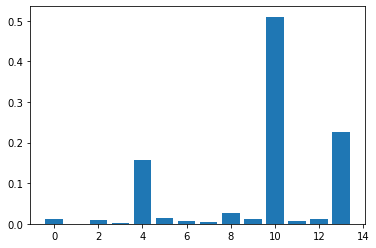

Accuracy: 0.7713329615170106


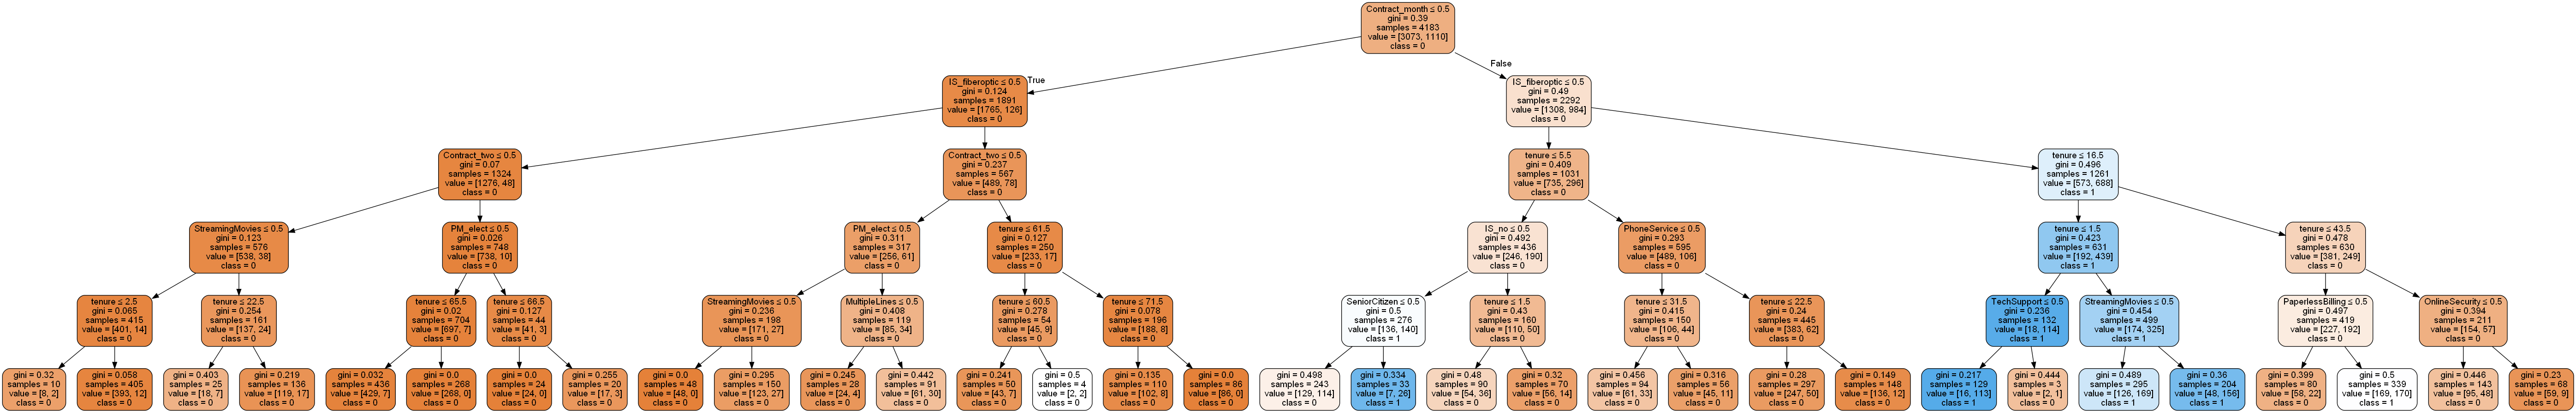

In [5]:
#tested feature combinations
feature_cols1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'IS_fiberoptic', 'IS_DSL', 'IS_no','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract_one', 'Contract_two', 'Contract_month', 'PM_mail', 'PM_elect', 'PM_credit', 'PM_bank', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges']
feature_cols2 = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'IS_fiberoptic', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract_one', 'Contract_month', 'PM_mail', 'PM_elect', 'PM_credit', 'PM_bank', 'PaperlessBilling', 'tenure']
feature_cols3 = ['SeniorCitizen', 'HouseholdPeople','PhoneService', 'MultipleLines', 'IS_fiberoptic', 'IS_no','OnlineSecurity', 'OnlineBackup', 'TechSupport','StreamingMovies', 'Contract_two', 'Contract_month', 'PM_elect', 'PM_credit', 'PM_bank', 'PaperlessBilling', 'tenure']

#final version
feature_cols = ['SeniorCitizen', 'HouseholdPeople','PhoneService', 'MultipleLines', 'IS_fiberoptic', 'IS_no','OnlineSecurity', 'TechSupport','StreamingMovies', 'Contract_two', 'Contract_month', 'PM_elect', 'PaperlessBilling', 'tenure']

x = tree_telecom[feature_cols]
y = tree_telecom.Churn

# splits dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier(max_depth=5)

# trains Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#from web page:  
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#predicts the response for test dataset
y_pred = clf.predict(X_test)

# model accuracy - how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('telecom.png')
Image(graph.create_png())

#text_representation = export_text(clf)
#print(text_representation)


# Insights

Significant "Buckets":  

MONTHLY CONTRACT (all buckets)

Phone Only
Tenure <= 5 months
(especially Senior Citizens)
(13% of all cases, 50% pure)
  
Fiber Optic
Tenure <= 16 months (40% of all cases, 70% pure)
Subtype:  Tenure 1 month (30% of all cases, 65% pure)
Subtype of subtype: Streaming Movies (14% of all cases, 76% pure)

Tenure between 16 and 44 months (17% of all cases, 46% pure)
Paperless Billing (15% of all cases, 50% pure)  